In [2]:
# Import Library yang akan digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

https://www.kaggle.com/code/nuozhou1/diabetes-classification-project#EDA-&-Data-Processing
https://www.kaggle.com/code/kredy10/simple-neural-network-for-diabetes-prediction

In [3]:
# Import style

plt.style.use('seaborn')

<ipython-input-3-f17b104517d9>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## 1. Business & Data Understanding

### Load Datasets

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_diabetes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pima-indians-diabetes.csv', names=['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class'])

## 2. Data Cleaning & Analysis

In [6]:
# Ternyata datanya sudah clean guys :)
df_diabetes.isnull().sum()

preg_times        0
glucose           0
blood_press       0
skin_thickness    0
insulin           0
BMI               0
pedigree          0
age               0
class             0
dtype: int64

In [7]:
df_diabetes.head()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   preg_times      768 non-null    int64  
 1   glucose         768 non-null    int64  
 2   blood_press     768 non-null    int64  
 3   skin_thickness  768 non-null    int64  
 4   insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   pedigree        768 non-null    float64
 7   age             768 non-null    int64  
 8   class           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df_diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
preg_times,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
blood_press,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin_thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [30]:
percent_missing = ((df_diabetes.isnull().sum()/df_diabetes.shape[0])*100)
num_values = len(df_diabetes) - df_diabetes.isnull().sum()
missing_df = pd.DataFrame({'Number of Values':num_values,
                           'Missing Percentage':percent_missing})
missing_df

,Number of Values,Missing Percentage
preg_times,768,0.0
glucose,768,0.0
blood_press,768,0.0
skin_thickness,768,0.0
insulin,768,0.0
BMI,768,0.0
pedigree,768,0.0
age,768,0.0
class,768,0.0


### Explore and Visualize Data

In [33]:
df_diabetes.columns

Index(['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin',
       'BMI', 'pedigree', 'age', 'class'],
      dtype='object')

In [11]:
print(f"Total Rows Data   : {df_diabetes.shape[0]}")
print(f"Total Column Data : {df_diabetes.shape[1]-1}")

Total Rows Data   : 768
Total Column Data : 8


<ipython-input-12-68af804d19c9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_diabetes["age"])


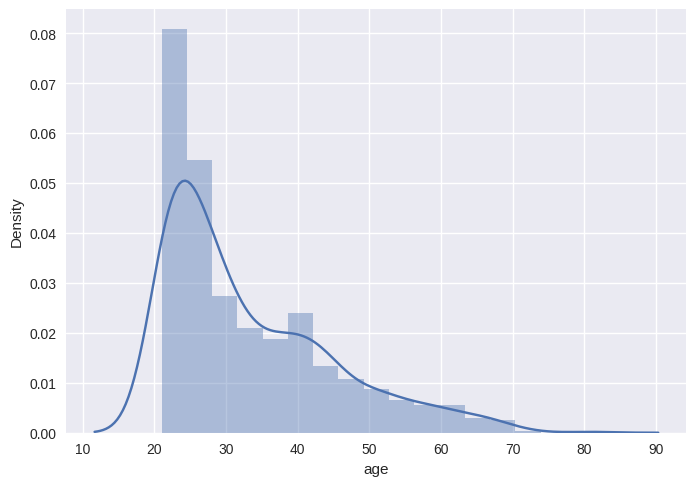

In [12]:
# Distribusi Plot berdasarkan usia
sns.distplot(df_diabetes["age"])
plt.show()

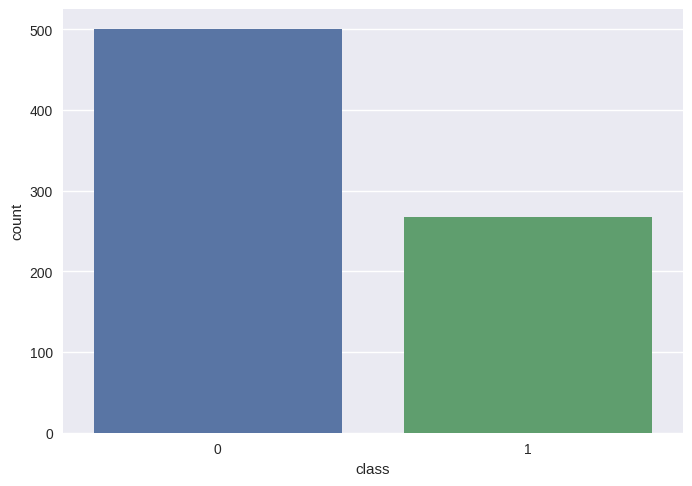

In [59]:
# Count a Class
sns.countplot(x='class', data=df_diabetes)
plt.show()

In [39]:
df_diabetes.columns

Index(['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin',
       'BMI', 'pedigree', 'age', 'class'],
      dtype='object')

<ipython-input-50-46255df78fe1>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df_diabetes[f[count]],ax=axes[i,j],color='darkred',kde=True,fit = norm)
<ipython-input-50-46255df78fe1>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df_diabetes[f[count]],ax=axes[i,j],color='darkred',k

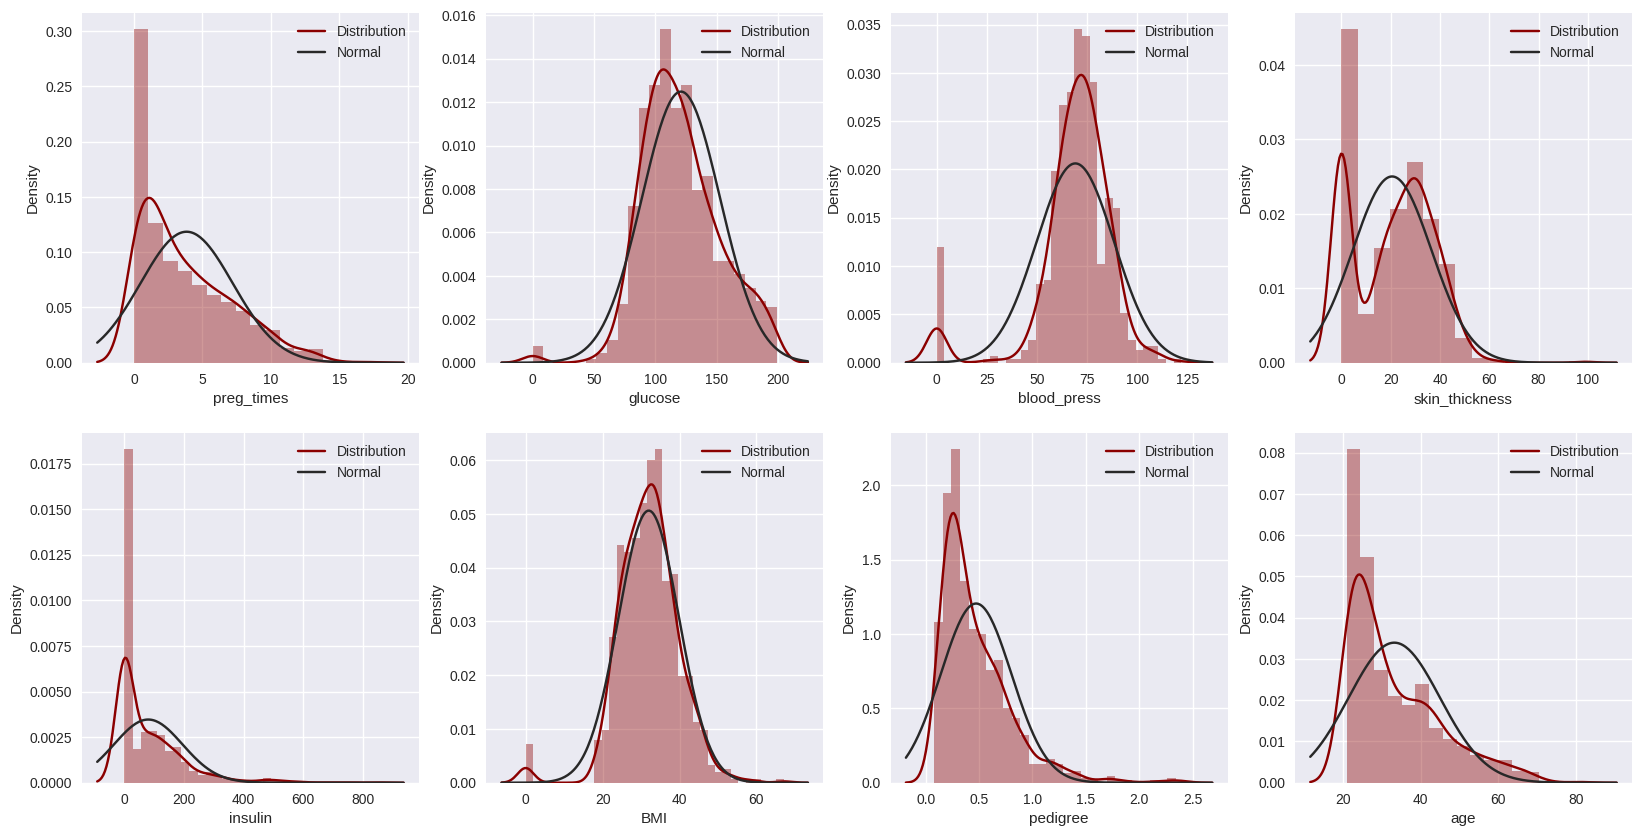

In [50]:
from scipy.stats import norm
f = ['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin',
       'BMI', 'pedigree', 'age']

nrows=2
ncolumns=4

# make a list of all dataframes 

fig, axes = plt.subplots(nrows, ncolumns,figsize =(20,10))

# plot counter
count=0
for i in range(nrows):
    for j in range(ncolumns):
        mu,sig = norm.fit(df_diabetes[f[count]])
        g = sns.distplot(df_diabetes[f[count]],ax=axes[i,j],color='darkred',kde=True,fit = norm)
        g.legend(['Distribution','Normal'])
        count+=1

plt.show()

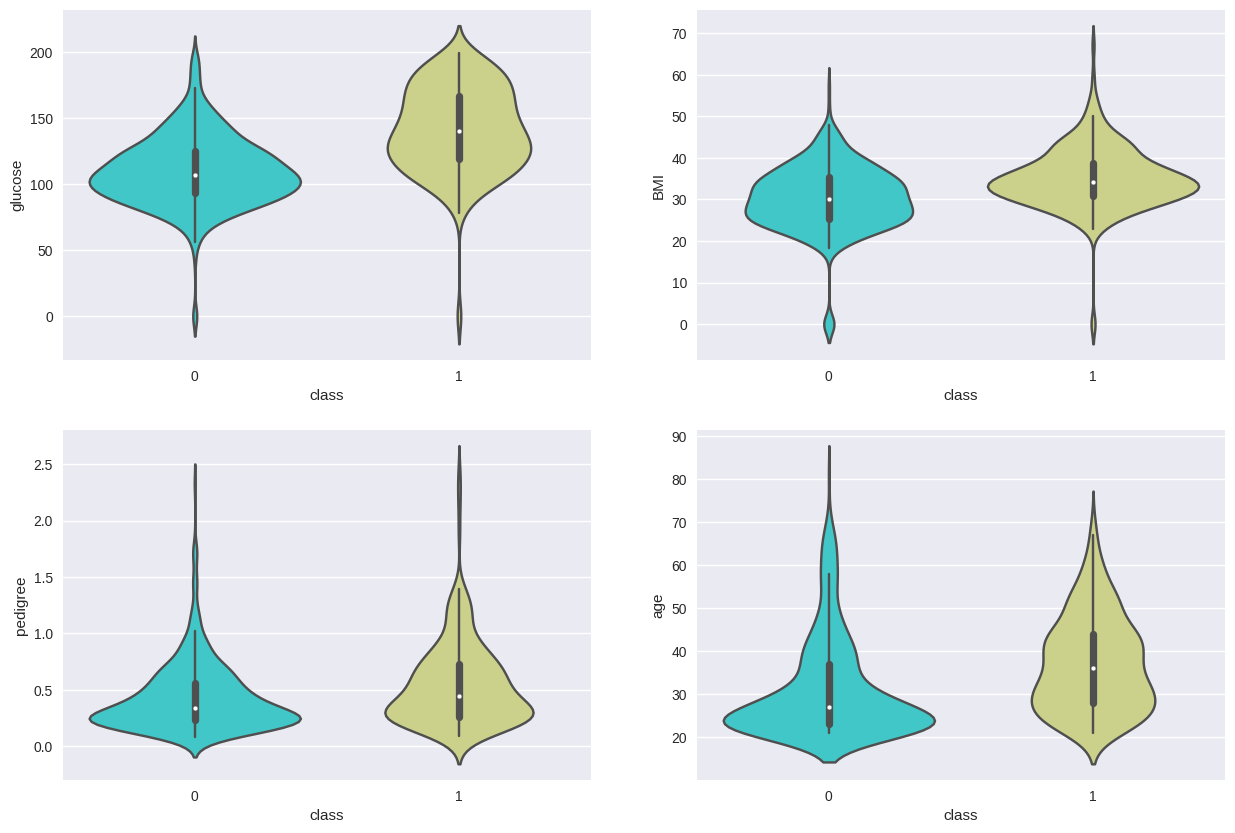

In [55]:
f = ['glucose','BMI', 'pedigree', 'age']
nrows=2
ncolumns=2

# make a list of all dataframes 

fig, axes = plt.subplots(nrows, ncolumns,figsize =(15,10))

# plot counter
count=0
for i in range(nrows):
    for j in range(ncolumns):
        sns.violinplot(data =df_diabetes, x = 'class',y=f[count],palette = 'rainbow',ax=axes[i,j])
        count+=1

<Axes: >

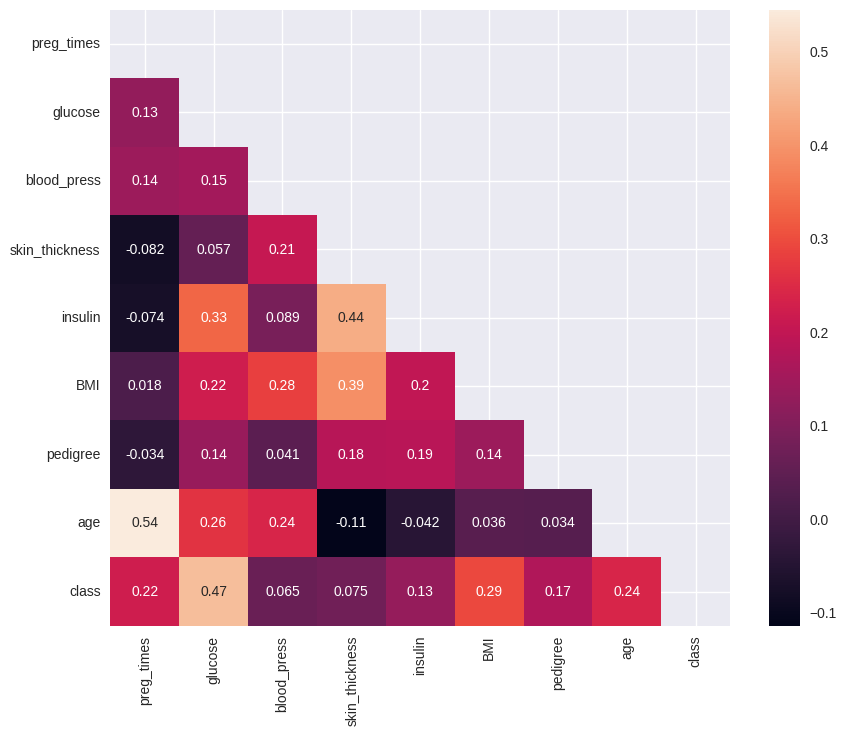

In [57]:
f, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(df_diabetes.corr()))
sns.heatmap(df_diabetes.corr(),annot = True,mask=mask)

### Spill Datasets

In [14]:
# Memisahkan datasets menjadi features dan labels
features = df_diabetes.drop('class', axis=1)
labels = df_diabetes["class"]

In [15]:
print(f"Features data : {features.shape}")
print(f"Labels data   : {labels.shape}")

Features data : (768, 8)
Labels data   : (768,)


In [16]:
# Memabgi data menjadi training data & testing data
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [17]:
 print(f'Data train : {np.unique(y_train)}')
 print(f'Data test  : {np.unique(y_test)}')

Data train : [0 1]
Data test  : [0 1]


## 3. Data Modeling

### Define Model

In [18]:
# Skalakan fitur menggunakan Standardscaller
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
# menggunakan model sequential dari keras
model = Sequential()

In [20]:
# mengecek persentase label class
df_diabetes["class"].value_counts()*100/len(df_diabetes)

0    65.104167
1    34.895833
Name: class, dtype: float64

In [21]:
# define layer yang akan digunakan
model.add(Dense(12, input_dim=8, activation='relu')) # Input + 1st Hidden layer
model.add(Dense(8, activation='relu')) # 2nd Hidden layer
model.add(Dense(1, activation="sigmoid")) # Output

In [22]:
# Show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


### Compile Model

In [23]:
# Compile Model, menentukan loss function, optimizer, metrics untuk di evaluasi
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

### Train the Model

In [24]:
# Training / fit keras model dengan datasets yang ada
model.fit(x_train, y_train, epochs=250, batch_size=8, verbose=1)

Epoch 1/250
77/77 [==============================] - 1s 2ms/step - loss: 0.6803 - accuracy: 0.6287
Epoch 2/250
77/77 [==============================] - 0s 2ms/step - loss: 0.6079 - accuracy: 0.7134
Epoch 3/250
77/77 [==============================] - 0s 2ms/step - loss: 0.5674 - accuracy: 0.7362
Epoch 4/250
77/77 [==============================] - 0s 2ms/step - loss: 0.5312 - accuracy: 0.7638
Epoch 5/250
77/77 [==============================] - 0s 2ms/step - loss: 0.5018 - accuracy: 0.7606
Epoch 6/250
77/77 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7622
Epoch 7/250
77/77 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.7720
Epoch 8/250
77/77 [==============================] - 0s 2ms/step - loss: 0.4565 - accuracy: 0.7818
Epoch 9/250
77/77 [==============================] - 0s 2ms/step - loss: 0.4503 - accuracy: 0.7883
Epoch 10/250
77/77 [==============================] - 0s 2ms/step - loss: 0.4449 - accuracy: 0.7948
Epoch 11/

In [25]:
# cek history isi model nya
model.history.history.keys()

dict_keys(['loss', 'accuracy'])

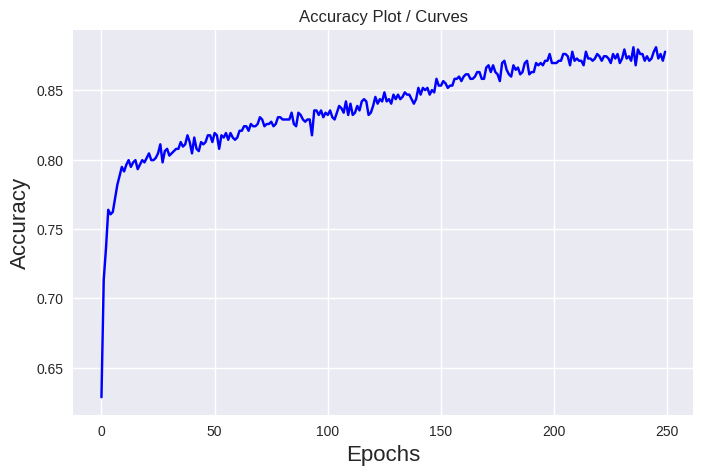

In [26]:
# plot akurasi model per epochs
plt.figure(figsize=(8,5))
plt.plot(model.history.history['accuracy'],'b')
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Plot / Curves')

plt.show()

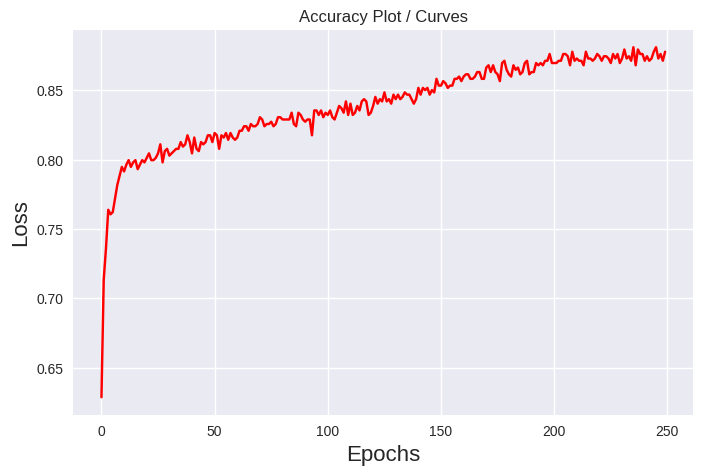

In [27]:
# plot akurasi model per epochs
plt.figure(figsize=(8,5))
plt.plot(model.history.history['accuracy'],'r')
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Accuracy Plot / Curves')

plt.show()

## 4. Model Evaluation

In [28]:
# Evaluasi model pada data test menggunakan akurasi
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Lossnya     : {loss}")
print(f"Accuracynya : {accuracy*100:0.0f}")

5/5 [==============================] - 0s 4ms/step - loss: 0.8364 - accuracy: 0.7403
Lossnya     : 0.8364287614822388
Accuracynya : 74


In [29]:
for i in range(len(model.layers)):
  print(f"Layer ke-{i+1} : \n{model.layers[i].get_config()}")
  print(f"Layer ke-{i+1} : \n{model.layers[i].get_weights()}")

Layer ke-1 : 
{'name': 'dense', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 8), 'units': 12, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
Layer ke-1 : 
[array([[ 0.52741426, -0.41273338,  0.4245155 ,  0.4215947 ,  0.03811248,
         0.14565441, -0.19029732, -0.30363968, -1.2392831 ,  0.14460638,
        -0.27573955, -0.45271328],
       [ 0.8556462 , -1.4111546 ,  0.4645219 ,  0.62004966,  0.07735828,
        -0.37442628, -0.5169021 ,  0.31080663,  0.4032955 , -0.5676772 ,
        -0.43002906,  0.5596764 ],
       [-0.45454416,  0.09275035,  0.03189575, -1.4258798 ,  0.15806691,
         0.49607873,  0.84912956,  0.78875595,  0.7523025 ,  0.04693366,
        -0.2723169 ,  0.80791384],
       [ 0